In [1]:
from nltk.lm.preprocessing import pad_both_ends
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder, TrigramAssocMeasures, TrigramCollocationFinder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from segmentation import CosineCost, plot_breakpoints
from discourse import plot_discourse
from horley_encoding import convert_to_horley
from scipy.stats import norm

import numpy as np
import os
import re

In [2]:
# Read and preprocess data

with open('data/I.csv', 'r') as file:
    raw_data_I = [line.split(',')[1][:-1] for line in file.readlines()]

# We remove glyph 999 (separator)
clean_lines_I = [line.replace("(", "").replace(")", "").replace("128", "001V.076").replace('999', '').replace('.076.', '.076-').replace("-022h-", "-").split('-') for line in raw_data_I]

encoded_lines_I = [[convert_to_horley(glyph) for glyph in line] for line in clean_lines_I]

In [3]:
encoded_lines_I

[['430.76',
  '21',
  '226',
  '270.6',
  '200.76',
  '21',
  '200.2a.6',
  '200.10',
  '700.76',
  '66.9',
  '29',
  '260.69.6.76',
  '200.999',
  '60',
  '2.76',
  '532.45',
  '6',
  '290.6.76',
  '730.6',
  '256',
  '200.6.76',
  '76.2a',
  '670',
  '1.76',
  '532',
  '2',
  '730.6.76',
  '40.532',
  '6.200.6',
  '200.522.6.76',
  '226.69',
  '270.6',
  '700.21.76',
  '1.9',
  '381',
  '755',
  '600.6',
  '40.290',
  '381.6.76',
  '532.7',
  '2',
  '95.37.76',
  '4.24',
  '200.2a',
  '200.10.76',
  '700f.10',
  '670',
  '68.?.76',
  '2',
  '700f',
  '381.6.76',
  '53',
  '700.61',
  '461.61.76',
  '600',
  '700.513',
  '66.76',
  '600',
  '270.6',
  '40.76',
  '270.532',
  '600',
  '381.6.76',
  '600',
  '9',
  '8.76',
  '381.6',
  '200.10.76',
  '40',
  '200',
  '381.10',
  '200.6.76',
  '256',
  '59.76',
  '90.532',
  '200.10',
  '74f.?.74f.76',
  '532',
  '226.76',
  '600',
  '200.513',
  '5.92.76',
  '522',
  '10.5.76',
  '79f',
  '4f',
  '660.660',
  '1v',
  '?',
  '200.6.76',


In [13]:
# Automatic extraction of the triads by splitting
# whenever we find glyph 076 as an appendage

sequences_I = []

for line in encoded_lines_I:
    i = 0
    j = 1
    while j < len(line):
        if line[j][-3:] == '.76':
            sequences_I.append(line[i:j])
            i = j
        j += 1

# We will add a special token to represent glyph 076
# when appended to the first glyph of the triad

for i in range(len(sequences_I)):
    sequences_I[i][0] = sequences_I[i][0][:-3]
    sequences_I[i].insert(1, '<76>')

sequences_I = [sequence for sequence in sequences_I if len(sequence) >= 4]

In [1]:
import os
import json
from segmentation import vectorize, save_glyphs, plot_breakpoints
from collocations import get_bigram_collocations, get_trigram_collocations, get_similar_glyphs
from processing import load_file, clean_lines, encode_lines, split_sequences
from nearest_neighbor import analyze_glyphs
from discourse import plot_discourse
from search import search_glyphs


In [11]:
raw_data = load_file('data/I.csv')
clean_data = clean_lines(raw_data)
encoded_data = encode_lines(clean_data)
sequences, fseq = split_sequences(encoded_data)

In [27]:
res = 0
for i in range(1, len(sequences)):
    try:
        if sequences[i][-1] == sequences[i-1][0] and '?' not in sequences[i][0]:
            res += 1
    except:
        pass

print(res/len(sequences))

0.02734375


In [3]:
trigrams = get_trigram_collocations(sequences)

In [6]:
trigrams

[(('600.6', '<76>', '532'), 174.7293518912822),
 (('90', '<76>', '532'), 165.52978274410052),
 (('90', '<76>', '71'), 141.0590548878943),
 (('600.6', '<76>', '70'), 139.68334904546637),
 (('90', '<76>', '11'), 137.08800150746913),
 (('90', '<76>', '70'), 135.72301338131334),
 (('430', '<76>', '532'), 127.81213998307531),
 (('90', '<76>', '21.1'), 116.25905573212759),
 (('600.6', '<76>', '71.61'), 110.07770313329577),
 (('90', '<76>', '57'), 104.99998741991828)]

In [4]:
bigrams = get_bigram_collocations(sequences)

In [5]:
bigrams

[(('600.6', '<76>'), 91.64933886506756),
 (('90', '<76>'), 83.26706649250204),
 (('430', '<76>'), 44.11822636823842),
 (('76', '<76>'), 19.018870739352618),
 (('99', '<76>'), 15.277567520212061),
 (('1v', '<76>'), 15.14078091247478),
 (('90.21', '<76>'), 15.133030892665495),
 (('633', '<76>'), 14.374227234998958),
 (('700', '<76>'), 14.033099831467432),
 (('290.6', '<76>'), 11.343951788600055),
 (('<76>', '532'), 81.31104619550416),
 (('<76>', '71'), 56.5291510468552),
 (('<76>', '11'), 53.433447392519085),
 (('<76>', '70'), 44.311220533620535),
 (('<76>', '75'), 27.957660501563595),
 (('<76>', '4f'), 25.65291764246221),
 (('<76>', '10.79f'), 20.81897225837221),
 (('<76>', '57'), 18.926007976824692),
 (('<76>', '2a.10'), 18.710669646634962),
 (('<76>', '6'), 18.710669646634962),
 (('600', '</s>'), 28.29758484420766),
 (('270.6', '</s>'), 11.200309485068523),
 (('90', '</s>'), 11.139657221646239),
 (('200.10', '</s>'), 8.023160125629731),
 (('40.290', '</s>'), 7.558760405082645),
 (('51

In [6]:
# Glyphs that most likely precede 076
padded = [list(pad_both_ends(sequence, 2)) for sequence in sequences_I]
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_documents(padded)
finder.apply_freq_filter(2)
finder.apply_ngram_filter(lambda *w: w[1] != '<76>' or w[0] == '?')
finder.score_ngrams(bigram_measures.likelihood_ratio)[:10]

[]

In [7]:
# Glyphs that most likely follow 076
finder = BigramCollocationFinder.from_documents(padded)
finder.apply_freq_filter(2)
finder.apply_ngram_filter(lambda *w: w[0] != '<76>')
finder.score_ngrams(bigram_measures.likelihood_ratio)[:10]

[]

In [8]:
# Glyphs that most likely occur as the final
# element in the sequence
finder = BigramCollocationFinder.from_documents(padded)
finder.apply_freq_filter(2)
finder.apply_ngram_filter(lambda *w: w[1] != '</s>')
finder.score_ngrams(bigram_measures.likelihood_ratio)[:10]

[]

In [9]:
trigram_measures = TrigramAssocMeasures()

# Now, let's check for the most likely combinations
# of the first (preceding) and second (following 76) glyphs
finder = TrigramCollocationFinder.from_documents(padded)
finder.apply_freq_filter(2)
finder.apply_ngram_filter(lambda *w: w[1] != '<76>')
finder.score_ngrams(trigram_measures.likelihood_ratio)[:10]

[]

In [10]:
line_str_I = [' '.join(line) for line in encoded_lines_I]

vectorizer = TfidfVectorizer(analyzer="word", token_pattern = '[0-9]+[a-zAZ]*[.0-9]*[a-zAZ]*')
vectorized_text = vectorizer.fit_transform(line_str_I)

NameError: name 'encoded_lines_I' is not defined

In [11]:
bkpts = plot_breakpoints(vectorized_text, [1, 2])

NameError: name 'plot_breakpoints' is not defined

In [12]:
# Most distinctive glyphs for each segment

feature_names = vectorizer.get_feature_names_out()
X = vectorized_text.toarray()

for bkpt in bkpts:
    indices = [0] + bkpt
    for i in range(len(indices) - 1):
        best_features = np.argmax(X[indices[i]:indices[i+1],:], axis=1)
        print(feature_names[list(set(best_features))])
    print('\n')

NameError: name 'vectorizer' is not defined

In [12]:
full_text = []
for line in encoded_lines_I:
    full_text.extend(line)

In [13]:
first_half = {}
second_half = {}

for glyph in set(full_text):
    if '?' not in glyph and full_text.count(glyph) >= 3:
        bounds = glyph_bound(glyph, encoded_lines_I)
        if bounds[1] < 6:
            first_half[glyph] = bounds
        elif bounds[0] >= 6:
            second_half[glyph] = bounds

# sel_glyphs_ordered = sorted(sel_glyphs.keys(), key=lambda x: sel_glyphs[x][0])
sel_glyphs = sorted(list(first_half)) + sorted(list(second_half))
sel_glyphs = [[glyph] for glyph in sel_glyphs]

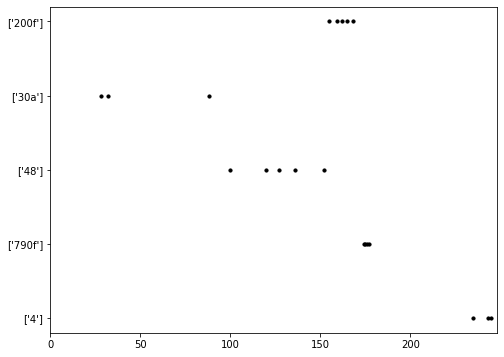

In [14]:
# Distribution of glyphs that appear exclusively
# in the first or second halves

plot_discourse(sel_glyphs, full_text)

In [15]:
common_trigrams = finder.score_ngrams(trigram_measures.likelihood_ratio)

In [16]:
xy_I = [(trigram[0][0], trigram[0][2]) for trigram in common_trigrams]

In [17]:
all_texts = {}

filenames = os.listdir("data/raw_texts/")
for filename in filenames:
    with open(f"data/raw_texts/{filename}", "r") as file:
        lines = file.readlines()
        raw_text = [line.split(',')[1][:-1] for line in lines]
        labels = [line.split(',')[0] for line in lines]
        clean_lines = [line.split('-') for line in raw_text]
        encoded_lines = [[convert_to_horley(glyph) for glyph in line] for line in clean_lines]
        for label, encoded_line in zip(labels, encoded_lines):
            all_texts[label] = ' '.join(encoded_line)

In [18]:
for line in all_texts:
    for pair in xy_I:
        pattern = fr"\b{'(.)'.join(pair)}\b"
        matches = re.findall(pattern, all_texts[line])
        if matches:
            print(line, pair)

In [19]:
def is_similar(a, b):
    a_glyphs = a.split('.')
    b_glyphs = b.split('.')
    if set(a_glyphs) & set(b_glyphs):
        return True
    return False

In [20]:
# sequences where the first and last glyphs are similar
xyx = [seq for seq in sequences_I if is_similar(seq[0], seq[-1])]

# sequences where the first and second glyphs are similar
xxz = [seq for seq in sequences_I if is_similar(seq[0], seq[2])]

# sequences where the second and final glyphs are similar
xyy = [seq for seq in sequences_I if is_similar(seq[2], seq[-1])]

In [21]:
print(len(xyx) / len(sequences_I))
print(len(xxz) / len(sequences_I))
print(len(xyy) / len(sequences_I))

0.2
0.06666666666666667
0.1


In [22]:
def glyph_indices(glyph, text):
    return [i for i, gl in enumerate(text) if gl == glyph]

def nearest_neighbor_analysis_1d(points, length, alpha=0.05):
    n_points = len(points)
    nearest_distances = np.diff(points)
    observed_mean_distance = np.mean(nearest_distances)
    expected_mean_distance = length / (n_points + 1)

    nnr = observed_mean_distance / expected_mean_distance
    
    sd = np.std(nearest_distances, ddof=1)

    standard_error = sd / np.sqrt(n_points)
    z_score = (observed_mean_distance - expected_mean_distance) / standard_error
    
    if abs(z_score) > norm.ppf(1 - alpha / 2):
        if z_score < 0:
            result = "clustered"
        else:
            result = "dispersed"
    else:
        result = "random"
    
    return z_score, result

In [31]:
clustered = []
dispersed = []

for glyph in set(full_text):
    if full_text.count(glyph) >= 4:
        points = glyph_indices(glyph, full_text)
        res = nearest_neighbor_analysis_1d(points, len(full_text))
        if res[1] == "clustered" and "?" not in glyph:
            clustered.append(glyph)
        elif res[1] == "dispersed" and "?" not in glyph:
            dispersed.append(glyph)

/tmp/ipykernel_68088/825426906.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  z_score = (observed_mean_distance - expected_mean_distance) / standard_error


In [32]:
clustered = sorted(clustered, key=lambda x: glyph_bound(x, encoded_lines_I))
clustered = [[glyph] for glyph in clustered]

In [33]:
sum([len(i) for i in encoded_lines_I][:6])

182

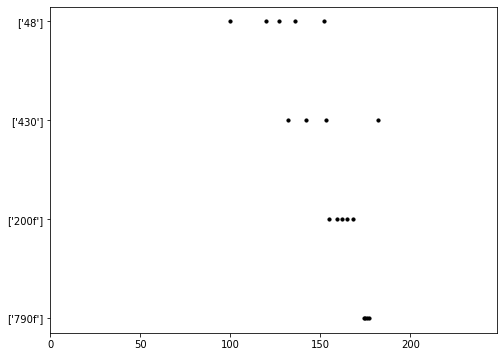

In [34]:
plot_discourse(clustered, full_text)

In [25]:
trigram_lists = [' '.join(trigram[0]).replace(' <76>', '.76').split() for trigram in common_trigrams]

In [26]:
def bigram_indices(x):
    res = []
    for i in range(len(full_text) - len(x) + 1):
        if full_text[i:i+len(x)] == x:
            res.append(i)
    return res

In [27]:
a = []
for i in trigram_lists:
    z = nearest_neighbor_analysis_1d(bigram_indices(i), len(full_text))
    if z[1] != 'random':
        a.append(i)

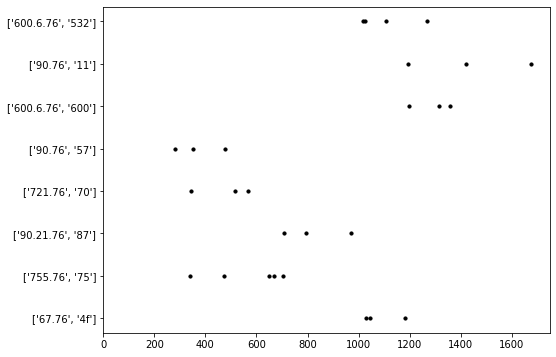

In [28]:
plot_discourse(a, full_text)

In [29]:
import pandas as pd
import scipy.stats as stats

In [30]:
triads = [i for i in sequences_I if len(i) == 4]

In [31]:
X = [i[0] for i in triads if "?" not in i[0]]
Y = [i[2] for i in triads if "?" not in i[2]]
Z = [i[-1] for i in triads if "?" not in i[-1]]

In [32]:
df1 = pd.DataFrame({'glyph': X, 'position': 'X'})
df2 = pd.DataFrame({'glyph': Y, 'position': 'Y'})
df3 = pd.DataFrame({'glyph': Z, 'position': 'Z'})

df = pd.concat([df1,df2,df3])

In [33]:
crosstab = pd.crosstab(df["glyph"], df["position"])

In [34]:
row_sums = crosstab.sum(axis=1)
crosstab = crosstab[row_sums >= 2]

In [35]:
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=449.67458359732314, pvalue=5.561598864853523e-22, dof=196, expected_freq=array([[ 0.71870398,  0.65684831,  0.62444772],
       [ 0.71870398,  0.65684831,  0.62444772],
       [ 2.15611193,  1.97054492,  1.87334315],
       [ 7.18703976,  6.56848306,  6.24447717],
       [ 1.07805596,  0.98527246,  0.93667158],
       [ 4.67157585,  4.26951399,  4.05891016],
       [ 4.31222386,  3.94108984,  3.7466863 ],
       [ 3.59351988,  3.28424153,  3.12223859],
       [ 4.31222386,  3.94108984,  3.7466863 ],
       [ 0.71870398,  0.65684831,  0.62444772],
       [ 3.23416789,  2.95581738,  2.81001473],
       [ 2.15611193,  1.97054492,  1.87334315],
       [ 0.71870398,  0.65684831,  0.62444772],
       [ 0.71870398,  0.65684831,  0.62444772],
       [ 1.07805596,  0.98527246,  0.93667158],
       [ 0.71870398,  0.65684831,  0.62444772],
       [ 2.15611193,  1.97054492,  1.87334315],
       [ 0.71870398,  0.65684831,  0.62444772],
       [ 3.59351988,  3.2842415

In [36]:
crosstab.sort_values(by='Z')

position,X,Y,Z
glyph,,,
1,1,1,0
522f,1,1,0
95,0,3,0
532.6,0,3,0
430.10,0,2,0
...,...,...,...
27,5,2,7
700,12,4,9
76,11,2,11
